# Latihan dengan data Sales

kita gunakan data Walmart Sales https://www.kaggle.com/datasets/mikhail1681/walmart-sales untuk latihan:

- import data
- data cleaning
- data exploration, EDA, buat insight
- build model ML
- build pipeline
- hyperparameter tuning
- model inference: dari dummy data, buat prediksi menggunakan model yang barusan kita buat
- save model (dengan joblib)


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

import joblib

In [2]:
df_sales = pd.read_csv("dataset/Walmart_Sales.csv")
df_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# ubah kolom Date jadi datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format="%d-%m-%Y")

In [6]:
df_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
# cek per kolom ada berapa valuesnya
df_sales['Store'].nunique()

45

ada 45 toko berbeda di dataset ini


In [10]:
print(df_sales['Date'].min(), "-", df_sales['Date'].max())

2010-02-05 00:00:00 - 2012-10-26 00:00:00


datanya ada dari 5 Feb 2010 sampai 26 Oct 2012


In [13]:
df_sales[['Weekly_Sales', 'Temperature',
          'Fuel_Price', 'CPI', 'Unemployment']].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


dari data ini sepertinya kita bisa explore dengan:

- cek outlier
- lihat trend dengan graph: sales over time, cpi, unemployment
- lihat distribusi weekly sales
- lihat distribusi temperature, fuel price
- proporsi holiday flag
- korelasi antara fitur2 - weekly sales vs holiday flag
- average sale per store (ada 45 stores)
- compare sales holiday vs non-holiday


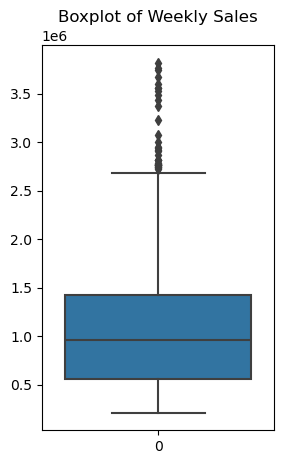

In [17]:
# cek outlier
plt.figure(figsize=(3, 5))
sns.boxplot(df_sales['Weekly_Sales'])
plt.title("Boxplot of Weekly Sales")
plt.show()

kita bisa lihat banyak upper outlier, dan tail nya jauh di atas. kemungkinan saat holiday jumlah sales jauh dari biasanya.


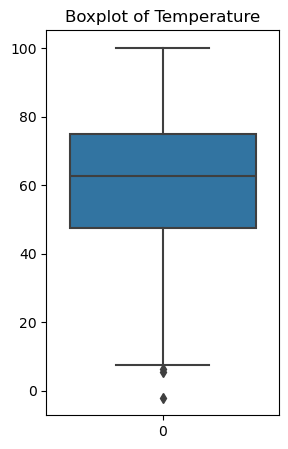

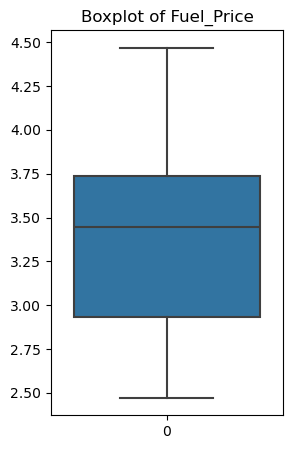

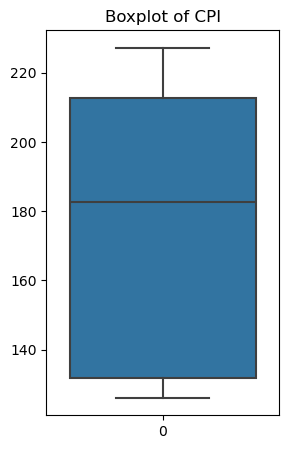

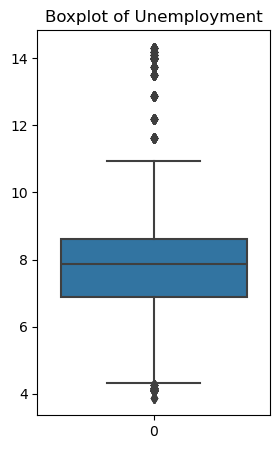

In [21]:
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    plt.figure(figsize=(3, 5))
    sns.boxplot(df_sales[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

dari boxplot nya, sepertinya selain temperatur yang dingin sekali tidak banyak outlier di temperatur.

untuk 3 fitur lainnya sepertinya lebih cocok kita buat line chart untuk lihat trend over time.


In [ ]:
# line charts
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# group per month
df_sales['YearMonth'] = df_sales['Date'].dt.year.astype(
    'str') + "-" + df_sales['Date'].dt.month.astype('str')

df_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,YearMonth
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-3


In [30]:
monthly_sales = df_sales.groupby(
    "YearMonth")['Weekly_Sales'].sum().reset_index()
monthly_sales.columns = ["YearMonth", "Monthly_Sales"]

monthly_sales.head()

,YearMonth,Monthly_Sales
0,2010-10,2.171618e+08
1,2010-11,2.028534e+08
2,2010-12,2.887605e+08
3,2010-2,1.903330e+08
4,2010-3,1.819198e+08


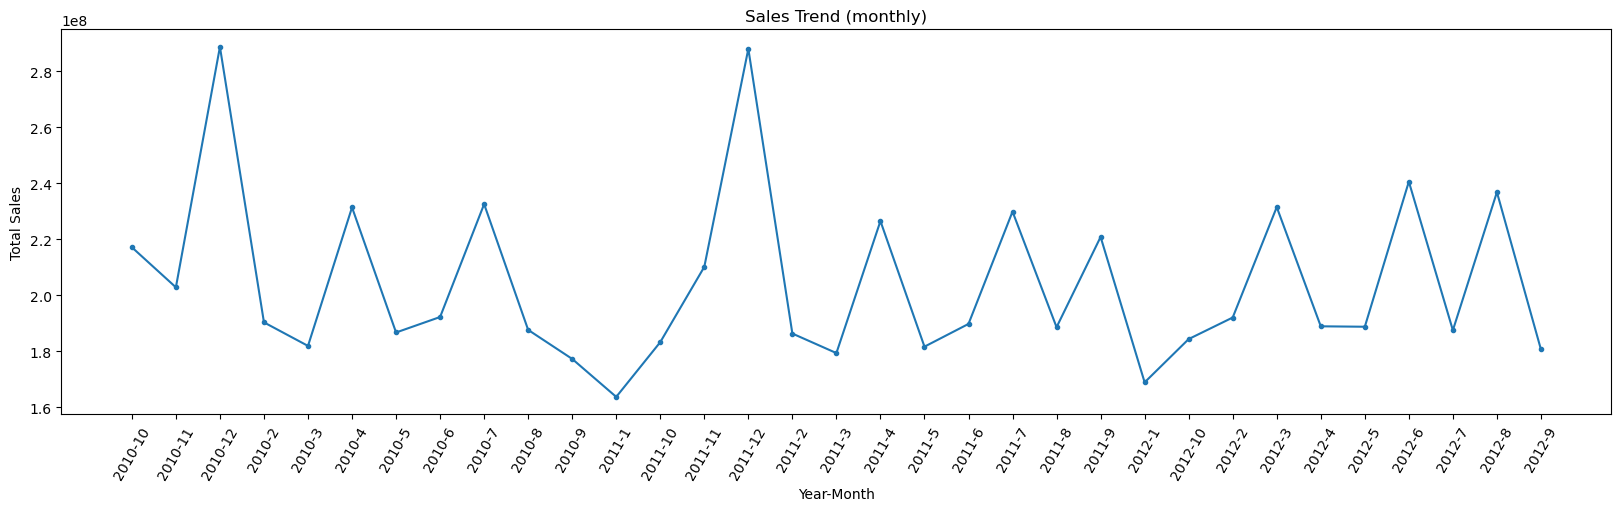

In [35]:
# line chart monthly sales total
plt.figure(figsize=(20, 5))
plt.plot(monthly_sales['YearMonth'],
         monthly_sales['Monthly_Sales'], marker=".")
plt.title("Sales Trend (monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=60)
plt.show()

dari trend nya kita bisa lihat kalau ada saat2 tertentu dimana sales nya naik. kita bisa coba cek seasonality dengan plot trend nya per tahun 1 line, jadi ada 3 lines.


In [36]:
df_sales['Year'] = df_sales['Date'].dt.year
df_sales['Month'] = df_sales['Date'].dt.month

df_sales.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,YearMonth,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-2,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-2,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-2,2010,2


In [41]:
# group lagi per year dan per month
monthly_sales = df_sales.groupby(['Year', 'Month'])[
    'Weekly_Sales'].sum().reset_index()

monthly_sales = monthly_sales.rename(columns={'Weekly_Sales': 'Monthly_Sales'})

monthly_sales.head(3)

,Year,Month,Monthly_Sales
0,2010,2,1.903330e+08
1,2010,3,1.819198e+08
2,2010,4,2.314124e+08


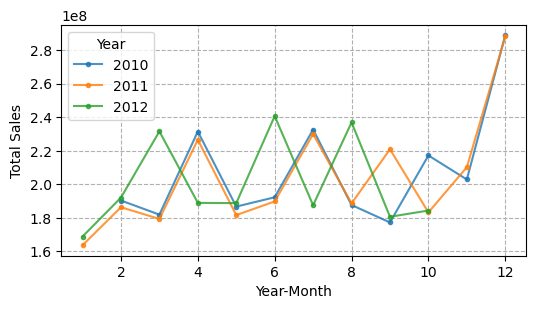

In [53]:
# line chart untuk cek seasonality
plt.figure(figsize=(6, 3))
for year, data in monthly_sales.groupby('Year'):
    plt.plot(data['Month'], data['Monthly_Sales'],
             marker=".", label=str(year), alpha=0.8)

plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.legend(title='Year')
plt.grid(True, linestyle="--")
plt.show()

dari chart ini sepertinya ada seasonality, sales naik paling banyak di bulan 12, lalu setiap tahun mundur dari paling banayk bulan 10 di 2010, ke bulan 9 di 2011, ke bulan 8 di 2012. dan ada peak lainnya juga.


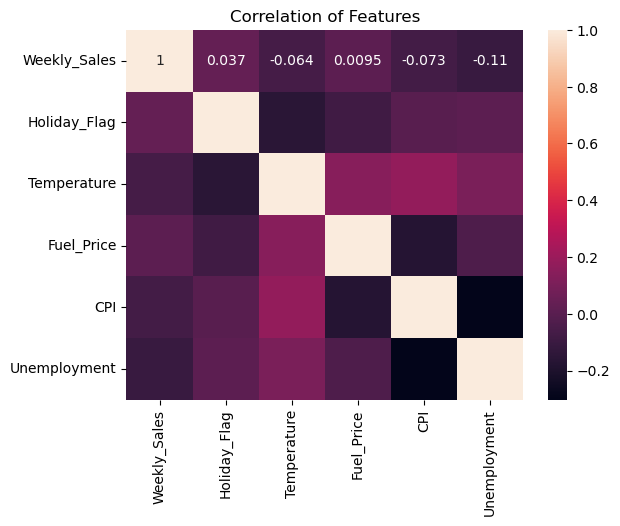

In [54]:
# correlation dengan heatmap
corr = df_sales[['Weekly_Sales', 'Holiday_Flag',
                 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title("Correlation of Features")
plt.show()

misalnya kita mau prediksi weekly sales tergantung dari month dan holiday/not yang di input


In [55]:
df_sales.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,YearMonth,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-2,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-2,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-2,2010,2


In [58]:
# fitur dan target
X = df_sales[['Month', 'Holiday_Flag']]
y = df_sales['Weekly_Sales']

# split data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# pipeline, include scaling, encoding, dll
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# latih model, sekaligus ikutin transformasi2 yg di apply di pipeline
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [60]:
# cek akurasi model
y_pred = pipe.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"rmse: {rmse}")
print(f"r2: {r2}")

rmse: 566553.2841577032
r2: 0.006231640553180373


setelah ini kita hyperparameter tuning, coba ML lain, test sampai jadi yg sesuai

setelah modelnya jadi, kita bisa save modelnya sebagai file terpisah untuk dipakai di tempat lain


In [62]:
# save model
joblib.dump(pipe, "walmart_sales_regmodel.pkl")
print("Model saved!")

Model saved!
